In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import folium
from datetime import datetime
import matplotlib as mpl

In [3]:
plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
df = pd.read_csv('/content/drive/MyDrive/데이터 공모전/민지작업/BC/data/BC군집화결과데이터셋-checkpoint.csv', encoding='utf-8')
df

,법정동코드,월,시간대,연령,총 결제수_1,평균 결제금액_1,남자소비비율_1,여자소비비율_1,총 결제수_2,평균 결제금액_2,...,평균 결제금액_6,남자소비비율_6,여자소비비율_6,총 결제수_7,평균 결제금액_7,남자소비비율_7,여자소비비율_7,pca1,pca2,pca3
0,1.502357e+09,6.43,4.10,4.33,20.28,77745.20,0.69,0.31,104.25,25167.38,...,15039.84,0.69,0.31,17.25,75690.36,0.71,0.29,1.61,2.45,0.34
1,2.249241e+09,6.61,4.06,4.63,13.76,64176.02,0.72,0.28,43.54,26813.54,...,15648.06,0.83,0.17,5.78,81290.41,0.87,0.13,-0.86,-1.33,0.07
2,2.313240e+09,6.43,3.92,4.54,12.36,60403.59,0.74,0.26,39.52,24438.72,...,15238.36,0.19,0.81,8.08,113208.03,0.78,0.22,0.25,-0.91,-0.02
3,1.165889e+09,6.51,4.10,4.18,40.84,77702.65,0.63,0.37,92.78,26332.48,...,16423.04,0.69,0.31,276.13,373722.39,0.73,0.27,1.89,2.44,-0.51
4,2.266381e+09,6.60,4.15,4.76,12.23,68053.57,0.76,0.24,41.39,27500.92,...,16859.42,0.86,0.14,7.83,96234.35,0.90,0.10,-2.18,0.47,-0.57
5,2.505571e+09,6.64,4.31,4.49,65.80,100782.68,0.63,0.37,128.59,29084.42,...,16606.34,0.66,0.34,8.46,112003.82,0.77,0.23,1.37,1.90,-0.26
6,2.538878e+09,6.75,4.31,4.50,15.69,70022.32,0.65,0.35,47.84,28345.38,...,17250.89,0.69,0.31,2.30,114058.15,0.12,0.88,1.42,-0.35,3.00
7,1.363047e+09,7.02,3.78,4.32,11.88,63023.82,0.71,0.29,54.17,26172.30,...,14607.61,0.81,0.19,5.13,42278.90,0.68,0.32,-0.97,0.21,0.41
8,2.288123e+09,6.69,4.20,4.63,18.87,81313.25,0.54,0.46,52.05,26971.05,...,15920.81,0.53,0.47,7.19,100321.20,0.88,0.12,2.21,-0.82,0.21
9,2.223365e+09,6.50,4.15,4.55,16.96,74640.46,0.65,0.35,49.48,27432.74,...,16204.32,0.73,0.27,6.77,79325.79,0.87,0.13,0.86,-0.30,-0.91


In [5]:
new_col = pd.Series(range(17), name='군집')
df.insert(0, '군집', new_col)
df

,군집,법정동코드,월,시간대,연령,총 결제수_1,평균 결제금액_1,남자소비비율_1,여자소비비율_1,총 결제수_2,...,평균 결제금액_6,남자소비비율_6,여자소비비율_6,총 결제수_7,평균 결제금액_7,남자소비비율_7,여자소비비율_7,pca1,pca2,pca3
0,0,1.502357e+09,6.43,4.10,4.33,20.28,77745.20,0.69,0.31,104.25,...,15039.84,0.69,0.31,17.25,75690.36,0.71,0.29,1.61,2.45,0.34
1,1,2.249241e+09,6.61,4.06,4.63,13.76,64176.02,0.72,0.28,43.54,...,15648.06,0.83,0.17,5.78,81290.41,0.87,0.13,-0.86,-1.33,0.07
2,2,2.313240e+09,6.43,3.92,4.54,12.36,60403.59,0.74,0.26,39.52,...,15238.36,0.19,0.81,8.08,113208.03,0.78,0.22,0.25,-0.91,-0.02
3,3,1.165889e+09,6.51,4.10,4.18,40.84,77702.65,0.63,0.37,92.78,...,16423.04,0.69,0.31,276.13,373722.39,0.73,0.27,1.89,2.44,-0.51
4,4,2.266381e+09,6.60,4.15,4.76,12.23,68053.57,0.76,0.24,41.39,...,16859.42,0.86,0.14,7.83,96234.35,0.90,0.10,-2.18,0.47,-0.57
5,5,2.505571e+09,6.64,4.31,4.49,65.80,100782.68,0.63,0.37,128.59,...,16606.34,0.66,0.34,8.46,112003.82,0.77,0.23,1.37,1.90,-0.26
6,6,2.538878e+09,6.75,4.31,4.50,15.69,70022.32,0.65,0.35,47.84,...,17250.89,0.69,0.31,2.30,114058.15,0.12,0.88,1.42,-0.35,3.00
7,7,1.363047e+09,7.02,3.78,4.32,11.88,63023.82,0.71,0.29,54.17,...,14607.61,0.81,0.19,5.13,42278.90,0.68,0.32,-0.97,0.21,0.41
8,8,2.288123e+09,6.69,4.20,4.63,18.87,81313.25,0.54,0.46,52.05,...,15920.81,0.53,0.47,7.19,100321.20,0.88,0.12,2.21,-0.82,0.21
9,9,2.223365e+09,6.50,4.15,4.55,16.96,74640.46,0.65,0.35,49.48,...,16204.32,0.73,0.27,6.77,79325.79,0.87,0.13,0.86,-0.30,-0.91


In [6]:
# df.to_csv('BC군집화결과_군집num추가.csv', index=False)

In [7]:
df.columns

Index(['군집', '법정동코드', '월', '시간대', '연령', '총 결제수_1', '평균 결제금액_1', '남자소비비율_1',
       '여자소비비율_1', '총 결제수_2', '평균 결제금액_2', '남자소비비율_2', '여자소비비율_2', '총 결제수_3',
       '평균 결제금액_3', '남자소비비율_3', '여자소비비율_3', '총 결제수_4', '평균 결제금액_4', '남자소비비율_4',
       '여자소비비율_4', '총 결제수_5', '평균 결제금액_5', '남자소비비율_5', '여자소비비율_5', '총 결제수_6',
       '평균 결제금액_6', '남자소비비율_6', '여자소비비율_6', '총 결제수_7', '평균 결제금액_7', '남자소비비율_7',
       '여자소비비율_7', 'pca1', 'pca2', 'pca3'],
      dtype='object')

## **군집별 업종별 결제수 분포**

In [8]:
sel = ['군집', '총 결제수_1', '총 결제수_2', '총 결제수_3', '총 결제수_4', '총 결제수_5', '총 결제수_6', '총 결제수_7']
df1 = df[sel]

# 컬럼명 변경
df1.rename(columns={'군집':'군집', '총 결제수_1':'업종1', '총 결제수_2':'업종2', '총 결제수_3':'업종3',
                   '총 결제수_4':'업종4', '총 결제수_5':'업종5', '총 결제수_6':'업종6', '총 결제수_7':'업종7'}, inplace=True)
df1.set_index('군집', inplace=True)

<ipython-input-8-5d78fc7c8e4a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'군집':'군집', '총 결제수_1':'업종1', '총 결제수_2':'업종2', '총 결제수_3':'업종3',


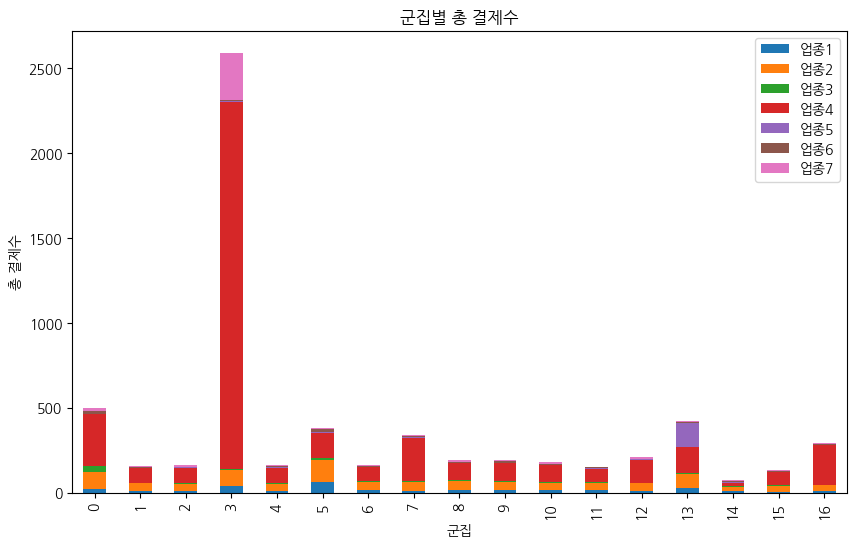

In [9]:
df1.plot(kind='bar', stacked=True, figsize=(10,6))
plt.xlabel('군집')
plt.ylabel('총 결제수')
plt.title('군집별 총 결제수')
plt.show()

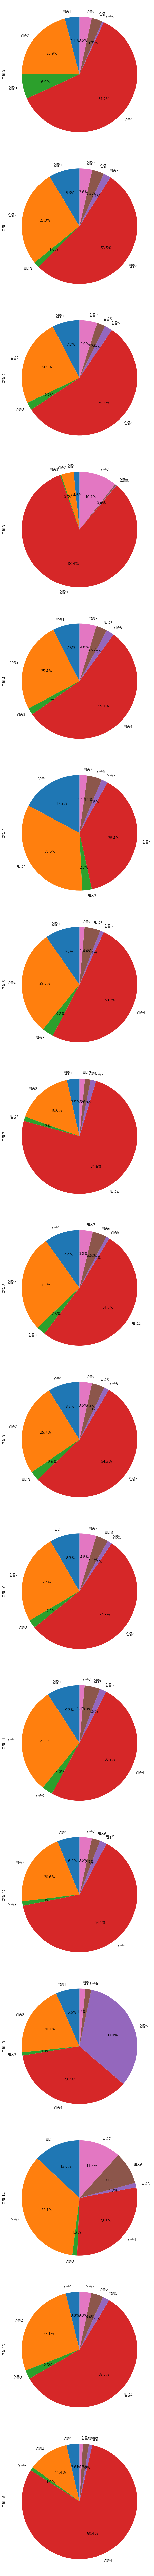

In [10]:
# 비율 계산
df_ratio = df1.div(df1.sum(axis=1), axis=0)

# 원형 차트 그리기
fig, axes = plt.subplots(nrows=len(df_ratio.index), ncols=1, figsize=(6, 6*len(df_ratio.index)))

# 각 군집별로 원형 차트 그리기
for i, idx in enumerate(df_ratio.index):
    ax = axes[i]
    df_ratio.loc[idx].plot(kind='pie', ax=ax, autopct='%.1f%%', startangle=90)
    ax.set_ylabel(f'군집 {idx}')

# 차트 출력
plt.tight_layout()
plt.show()


## **군집별 업종별 결제 금액분포**

In [11]:
sel = ['군집', '평균 결제금액_1', '평균 결제금액_2', '평균 결제금액_3', '평균 결제금액_4', '평균 결제금액_5', '평균 결제금액_6', '평균 결제금액_7']
df2 = df[sel]

# 컬럼명 변경
df2.rename(columns={'군집':'군집', '평균 결제금액_1':'업종1', '평균 결제금액_2':'업종2', '평균 결제금액_3':'업종3',
                    '평균 결제금액_4':'업종4', '평균 결제금액_5':'업종5', '평균 결제금액_6':'업종6', '평균 결제금액_7':'업종7'}, inplace=True)
df2.set_index('군집', inplace=True)

<ipython-input-11-cffb4232ee1c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={'군집':'군집', '평균 결제금액_1':'업종1', '평균 결제금액_2':'업종2', '평균 결제금액_3':'업종3',


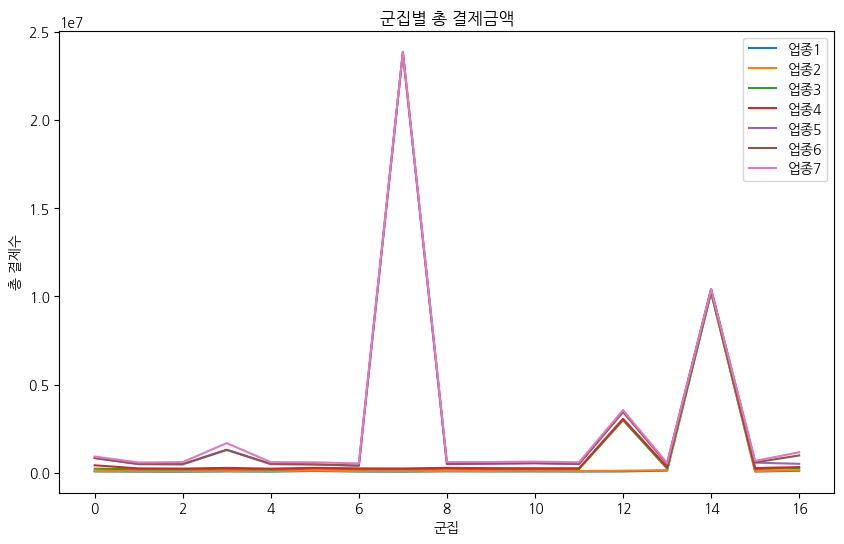

In [12]:
df2.plot(kind='line', stacked=True, figsize=(10,6))
plt.xlabel('군집')
plt.ylabel('총 결제수')
plt.title('군집별 총 결제금액')
plt.show()

In [13]:
# 아래 정규화하고 다시 뽑은거

## **군집별 업종별 남여 소비비율 차이**

In [22]:
sel = ['군집', '남자소비비율_1', '여자소비비율_1', '남자소비비율_2', '여자소비비율_2', '남자소비비율_3', '여자소비비율_3', '남자소비비율_4', '여자소비비율_4',
       '남자소비비율_5', '여자소비비율_5', '남자소비비율_6', '여자소비비율_6', '남자소비비율_7', '여자소비비율_7']
df3 = df[sel]

# 컬럼명 변경
df3.rename(columns={'군집':'군집', '남자소비비율_1':'업종1남자', '여자소비비율_1':'업종1여자', '남자소비비율_2':'업종2남자', '여자소비비율_2':'업종2여자',
                    '남자소비비율_3':'업종3남자', '여자소비비율_3':'업종3여자',
                    '남자소비비율_4':'업종4남자', '여자소비비율_4':'업종4여자', '남자소비비율_5':'업종5남자', '여자소비비율_5':'업종5여자',
                    '남자소비비율_6':'업종6남자', '여자소비비율_6':'업종6여자', '남자소비비율_7':'업종7남자', '여자소비비율_7':'업종7여자'}, inplace=True)

sel_m = ['군집', '업종1남자','업종2남자', '업종3남자', '업종4남자','업종5남자', '업종6남자', '업종7남자']
df3_m = df3[sel_m]


sel_w = ['군집', '업종1여자','업종2여자', '업종3여자', '업종4여자','업종5여자', '업종6여자', '업종7여자']
df3_w = df3[sel_w]


# df3.set_index('군집', inplace=True)

<ipython-input-22-d43eab6b7c6f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.rename(columns={'군집':'군집', '남자소비비율_1':'업종1남자', '여자소비비율_1':'업종1여자', '남자소비비율_2':'업종2남자', '여자소비비율_2':'업종2여자',


In [ ]:
df3.columns

Index(['업종1남자', '업종1여자', '업종2남자', '업종2여자', '업종3남자', '업종3여자', '업종4남자', '업종4여자',
       '업종5남자', '업종5여자', '업종6남자', '업종6여자', '업종7남자', '업종7여자'],
      dtype='object')

### **남자**

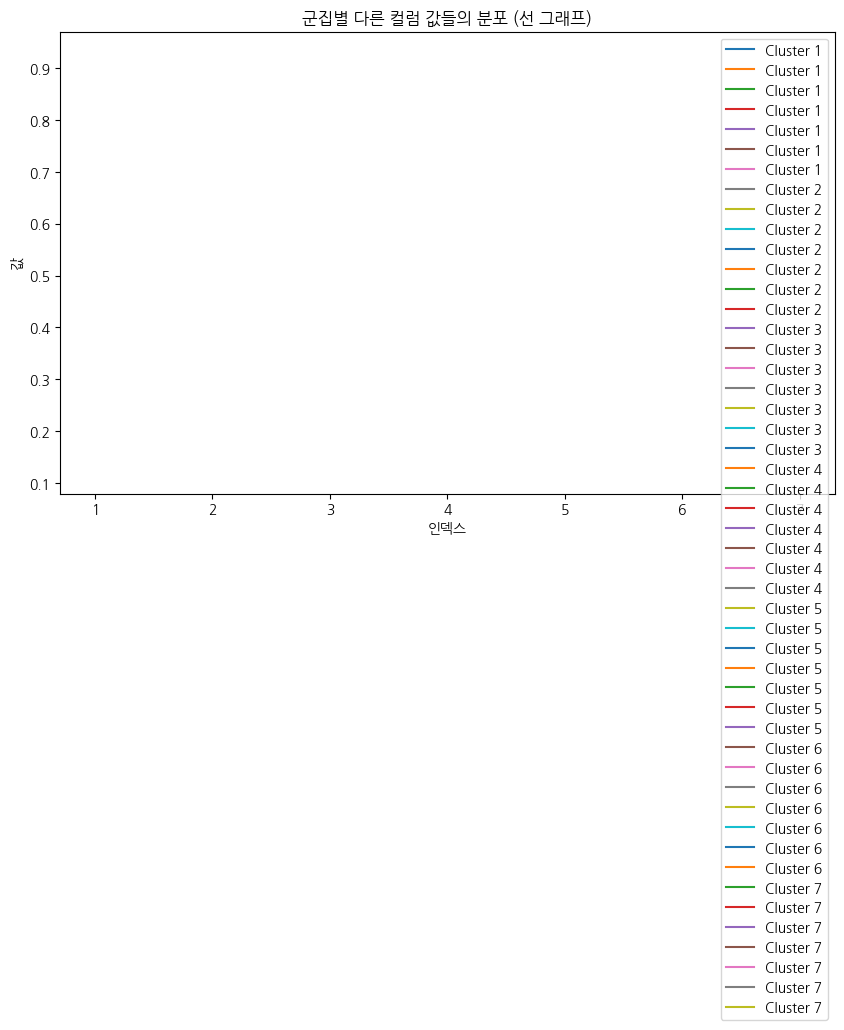

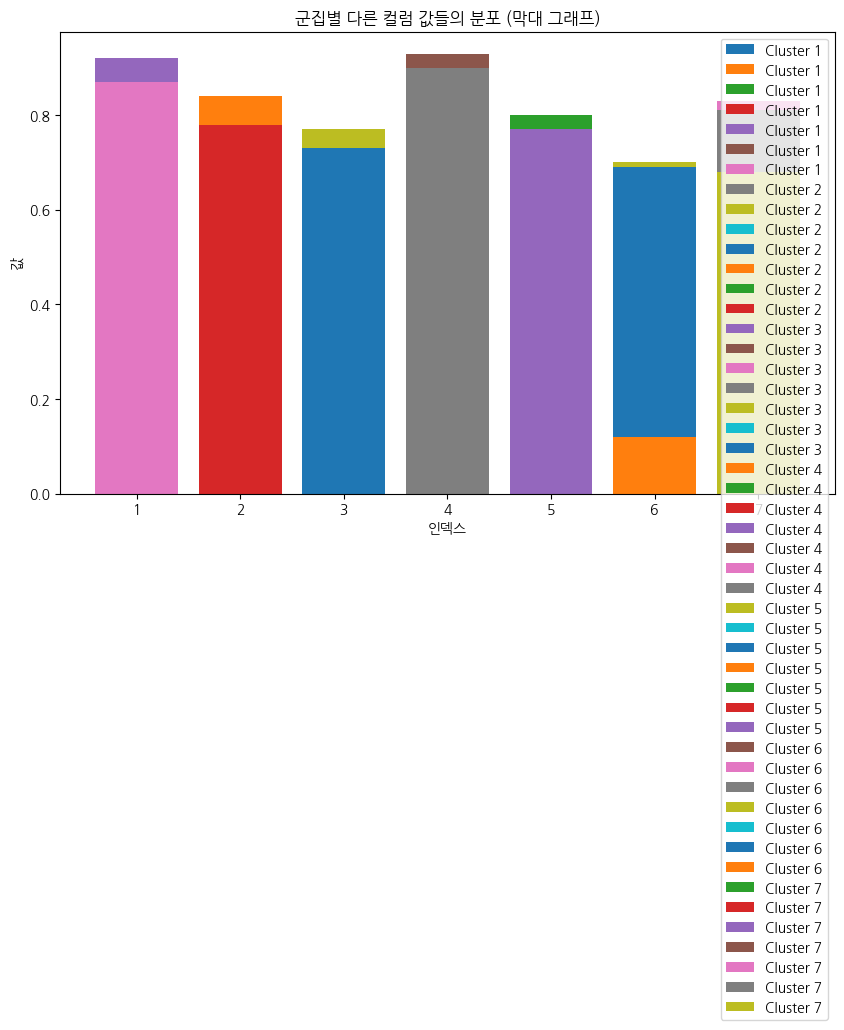

In [21]:
# 군집별 다른 컬럼 값들의 분포 선 그래프
plt.figure(figsize=(10, 6))
for i in range(1, 8):
    cluster_data = df3_m[df3_m['군집'] == i]
    plt.plot(cluster_data['업종1남자'], label='Cluster ' + str(i))
    plt.plot(cluster_data['업종2남자'], label='Cluster ' + str(i))
    plt.plot(cluster_data['업종3남자'], label='Cluster ' + str(i))
    plt.plot(cluster_data['업종4남자'], label='Cluster ' + str(i))
    plt.plot(cluster_data['업종5남자'], label='Cluster ' + str(i))
    plt.plot(cluster_data['업종6남자'], label='Cluster ' + str(i))
    plt.plot(cluster_data['업종7남자'], label='Cluster ' + str(i))
plt.xlabel('인덱스')
plt.ylabel('값')
plt.title('군집별 다른 컬럼 값들의 분포 (선 그래프)')
plt.legend()
plt.show()

# 군집별 다른 컬럼 값들의 분포 막대 그래프
plt.figure(figsize=(10, 6))
for i in range(1, 8):
    cluster_data = df3_m[df3_m['군집'] == i]
    plt.bar(cluster_data.index, cluster_data['업종1남자'], label='Cluster ' + str(i))
    plt.bar(cluster_data.index, cluster_data['업종2남자'], label='Cluster ' + str(i))
    plt.bar(cluster_data.index, cluster_data['업종3남자'], label='Cluster ' + str(i))
    plt.bar(cluster_data.index, cluster_data['업종4남자'], label='Cluster ' + str(i))
    plt.bar(cluster_data.index, cluster_data['업종5남자'], label='Cluster ' + str(i))
    plt.bar(cluster_data.index, cluster_data['업종6남자'], label='Cluster ' + str(i))
    plt.bar(cluster_data.index, cluster_data['업종7남자'], label='Cluster ' + str(i))
plt.xlabel('인덱스')
plt.ylabel('값')
plt.title('군집별 다른 컬럼 값들의 분포 (막대 그래프)')
plt.legend()
plt.show()


### **여자**

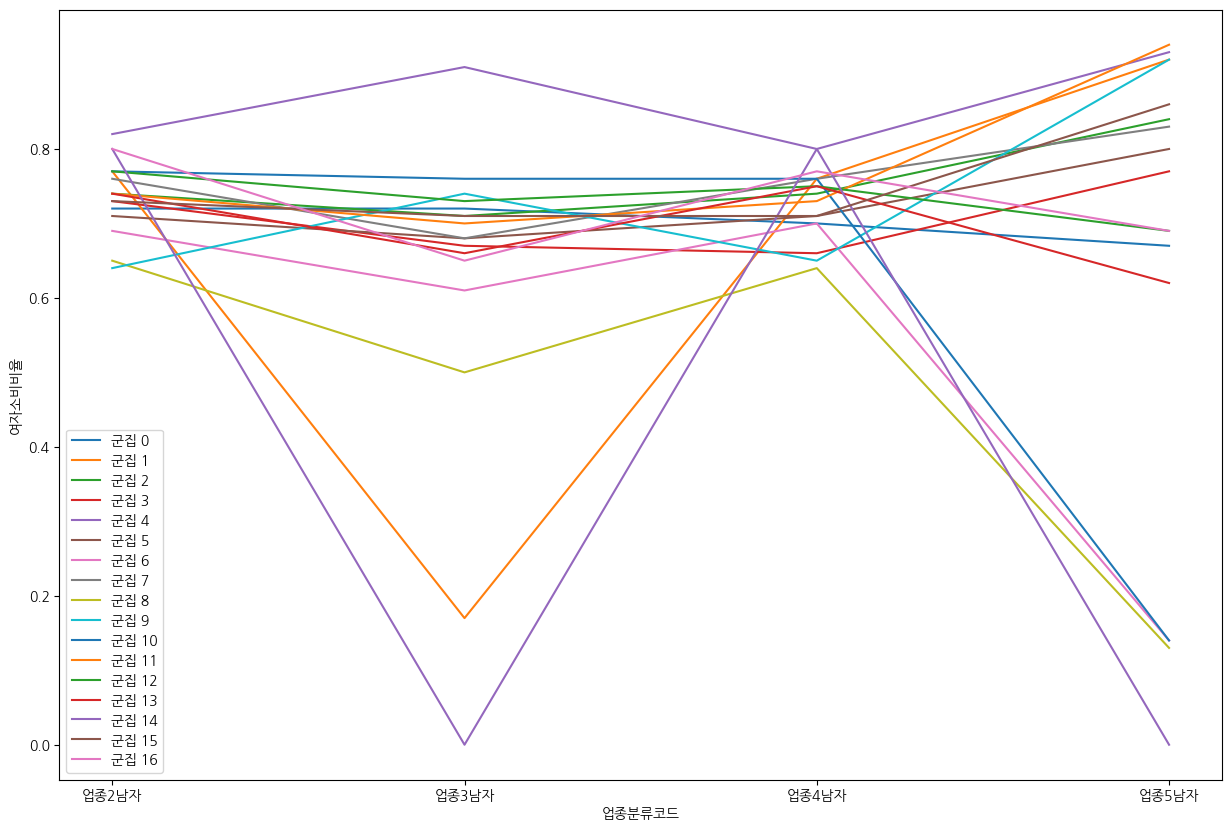

In [ ]:
# 군집별 여자소비비율 분포 그리기
fig, ax = plt.subplots(figsize=(15,10))
for i in range(k):
    cluster_data = df3[df3.index == i]
    ax.plot(cluster_data.columns[2:9:2], cluster_data.iloc[:,2:9:2].values.flatten(), label=f'군집 {i}')
ax.legend()
ax.set_xlabel('업종분류코드')
ax.set_ylabel('여자소비비율')
plt.show()

### **남여비교**

In [ ]:
# 군집별 업종별 남자여자소비비율 그리기

def plot_pie_chart(cluster_data):
    labels = cluster_data.columns[1:8]
    men_ratios = cluster_data.iloc[:,1:8:2].values.flatten()
    women_ratios = cluster_data.iloc[:,2:9:2].values.flatten()
    fig, ax = plt.subplots()
    ax.axis('equal')
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']
    for i in range(len(cluster_data)):
        ratios = [men_ratios[i], women_ratios[i]]
        ax.pie(ratios, startangle=90-180*i/len(cluster_data), counterclock=False,
               labels=labels, colors=colors, labeldistance=None, autopct='%1.1f%%', pctdistance=0.6)
    plt.show()

for i in range(k):
    cluster_data = df3[df3.index == i]
    plot_pie_chart(cluster_data)


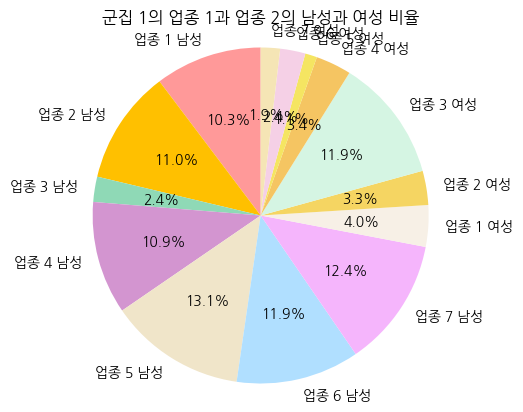

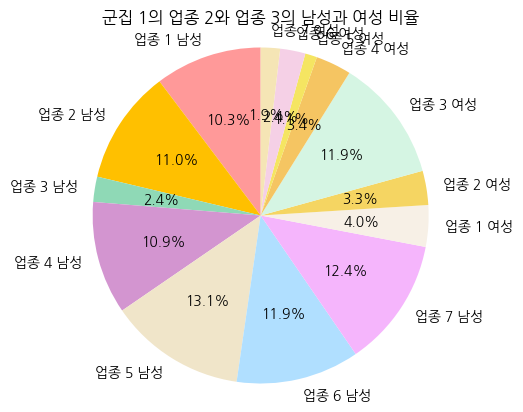

In [28]:
# 업종별 남성과 여성 소비비율을 추출할 열들
column_names = ['군집', '업종1남자', '업종1여자', '업종2남자', '업종2여자', '업종3남자', '업종3여자', '업종4남자', '업종4여자', '업종5남자', '업종5여자', '업종6남자', '업종6여자', '업종7남자', '업종7여자']

# 데이터프레임에서 업종별 소비비율 추출
def extract_gender_ratio_by_cluster(df3, cluster):
    gender_ratio_columns = [f'업종{i}남자' for i in range(1, 8)] + [f'업종{i}여자' for i in range(1, 8)]
    gender_ratio = df3[df3['군집'] == cluster][gender_ratio_columns].sum()
    return gender_ratio

# 파이 차트 시각화
def plot_pie_chart(gender_ratio, title):
    labels = [f'업종 {i} 남성' for i in range(1, 8)] + [f'업종 {i} 여성' for i in range(1, 8)]
    sizes = gender_ratio.values
    colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#f0e5c9', '#b0dfff', '#f5b5fc', '#f7f0e6', '#f5d562', '#d5f5e3', '#f5c562', '#f5e562', '#f5d0e6', '#f5e5b5', '#f5b562']
    explode = tuple([0]*14)
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title(title)
    plt.show()

# 군집 1의 업종 1과 업종 2의 남성과 여성 비율을 추출하고 파이 차트 시각화
cluster = 1
gender_ratio = extract_gender_ratio_by_cluster(df3, cluster)
title = f'군집 {cluster}의 업종 1과 업종 2의 남성과 여성 비율'
plot_pie_chart(gender_ratio, title)

# 군집 1의 업종 2와 업종 3의 남성과 여성 비율을 추출하고 파이 차트 시각화
cluster = 1
gender_ratio = extract_gender_ratio_by_cluster(df3, cluster)
title = f'군집 {cluster}의 업종 2와 업종 3의 남성과 여성 비율'
plot_pie_chart(gender_ratio, title)


# **표준화하고 다시**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['총 결제수_1', '평균 결제금액_1', '총 결제수_2', '평균 결제금액_2', '총 결제수_3',
       '평균 결제금액_3', '총 결제수_4', '평균 결제금액_4', '총 결제수_5', '평균 결제금액_5', '총 결제수_6',
       '평균 결제금액_6',  '총 결제수_7', '평균 결제금액_7']

# 정규화할 데이터 추출
data_to_normalize = df[columns_to_normalize]

# MinMaxScaler 객체 생성 및 정규화
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data_to_normalize)

# 정규화된 데이터를 데이터프레임으로 변환
df_normalized = pd.DataFrame(normalized_data, columns=columns_to_normalize)
df_normalized

,총 결제수_1,평균 결제금액_1,총 결제수_2,평균 결제금액_2,총 결제수_3,평균 결제금액_3,총 결제수_4,평균 결제금액_4,총 결제수_5,평균 결제금액_5,총 결제수_6,평균 결제금액_6,총 결제수_7,평균 결제금액_7
0,0.249835,0.001708,0.760409,0.048147,1.000000,0.038174,0.132628,1.000000,0.010296,0.016783,0.945652,0.005131,0.054976,0.193661
1,0.142386,0.000372,0.162811,0.156917,0.047307,0.029664,0.029638,0.054750,0.016920,0.009720,0.137960,0.006448,0.013105,0.208812
2,0.119314,0.000000,0.123240,0.000000,0.074680,0.028821,0.032120,0.048030,0.018792,0.009725,0.000000,0.005561,0.021501,0.295167
3,0.588662,0.001704,0.647505,0.125131,0.204106,0.030864,1.000000,0.153554,0.018432,0.042612,0.477425,0.008127,1.000000,1.000000
4,0.117172,0.000753,0.141648,0.202336,0.063672,0.023458,0.031793,0.053109,0.019152,0.010445,0.111204,0.009073,0.020588,0.249244
5,1.000000,0.003977,1.000000,0.306967,0.282059,0.030652,0.058515,0.000676,0.042696,0.007449,1.000000,0.008524,0.022888,0.291909
6,0.174192,0.000947,0.205138,0.258134,0.126450,0.030298,0.028189,0.000000,0.005472,0.005820,0.297659,0.009921,0.000402,0.297467
7,0.111404,0.000258,0.267448,0.114547,0.096102,0.031234,0.108004,0.019566,0.030816,1.000000,0.160535,0.004194,0.010732,0.103265
8,0.226599,0.002059,0.246579,0.167325,0.113359,0.034265,0.035948,0.063677,0.006408,0.008635,0.319398,0.007039,0.018252,0.260301
9,0.195122,0.001402,0.221282,0.197831,0.119310,0.030833,0.038552,0.052759,0.012744,0.010264,0.267559,0.007653,0.016719,0.203497


In [ ]:
new_col = pd.Series(range(17), name='군집')
df_normalized.insert(0, '군집', new_col)
df_normalized

,군집,총 결제수_1,평균 결제금액_1,총 결제수_2,평균 결제금액_2,총 결제수_3,평균 결제금액_3,총 결제수_4,평균 결제금액_4,총 결제수_5,평균 결제금액_5,총 결제수_6,평균 결제금액_6,총 결제수_7,평균 결제금액_7
0,0,0.249835,0.001708,0.760409,0.048147,1.000000,0.038174,0.132628,1.000000,0.010296,0.016783,0.945652,0.005131,0.054976,0.193661
1,1,0.142386,0.000372,0.162811,0.156917,0.047307,0.029664,0.029638,0.054750,0.016920,0.009720,0.137960,0.006448,0.013105,0.208812
2,2,0.119314,0.000000,0.123240,0.000000,0.074680,0.028821,0.032120,0.048030,0.018792,0.009725,0.000000,0.005561,0.021501,0.295167
3,3,0.588662,0.001704,0.647505,0.125131,0.204106,0.030864,1.000000,0.153554,0.018432,0.042612,0.477425,0.008127,1.000000,1.000000
4,4,0.117172,0.000753,0.141648,0.202336,0.063672,0.023458,0.031793,0.053109,0.019152,0.010445,0.111204,0.009073,0.020588,0.249244
5,5,1.000000,0.003977,1.000000,0.306967,0.282059,0.030652,0.058515,0.000676,0.042696,0.007449,1.000000,0.008524,0.022888,0.291909
6,6,0.174192,0.000947,0.205138,0.258134,0.126450,0.030298,0.028189,0.000000,0.005472,0.005820,0.297659,0.009921,0.000402,0.297467
7,7,0.111404,0.000258,0.267448,0.114547,0.096102,0.031234,0.108004,0.019566,0.030816,1.000000,0.160535,0.004194,0.010732,0.103265
8,8,0.226599,0.002059,0.246579,0.167325,0.113359,0.034265,0.035948,0.063677,0.006408,0.008635,0.319398,0.007039,0.018252,0.260301
9,9,0.195122,0.001402,0.221282,0.197831,0.119310,0.030833,0.038552,0.052759,0.012744,0.010264,0.267559,0.007653,0.016719,0.203497


## **군집별 업종별 결제수 분포**

In [ ]:
sel = ['군집', '총 결제수_1', '총 결제수_2', '총 결제수_3', '총 결제수_4', '총 결제수_5', '총 결제수_6', '총 결제수_7']
df_s1 = df_normalized[sel]

# 컬럼명 변경
df_s1.rename(columns={'군집':'군집', '총 결제수_1':'업종1', '총 결제수_2':'업종2', '총 결제수_3':'업종3',
                   '총 결제수_4':'업종4', '총 결제수_5':'업종5', '총 결제수_6':'업종6', '총 결제수_7':'업종7'}, inplace=True)
df_s1.set_index('군집', inplace=True)

<ipython-input-44-83c6bf8c0879>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s1.rename(columns={'군집':'군집', '총 결제수_1':'업종1', '총 결제수_2':'업종2', '총 결제수_3':'업종3',


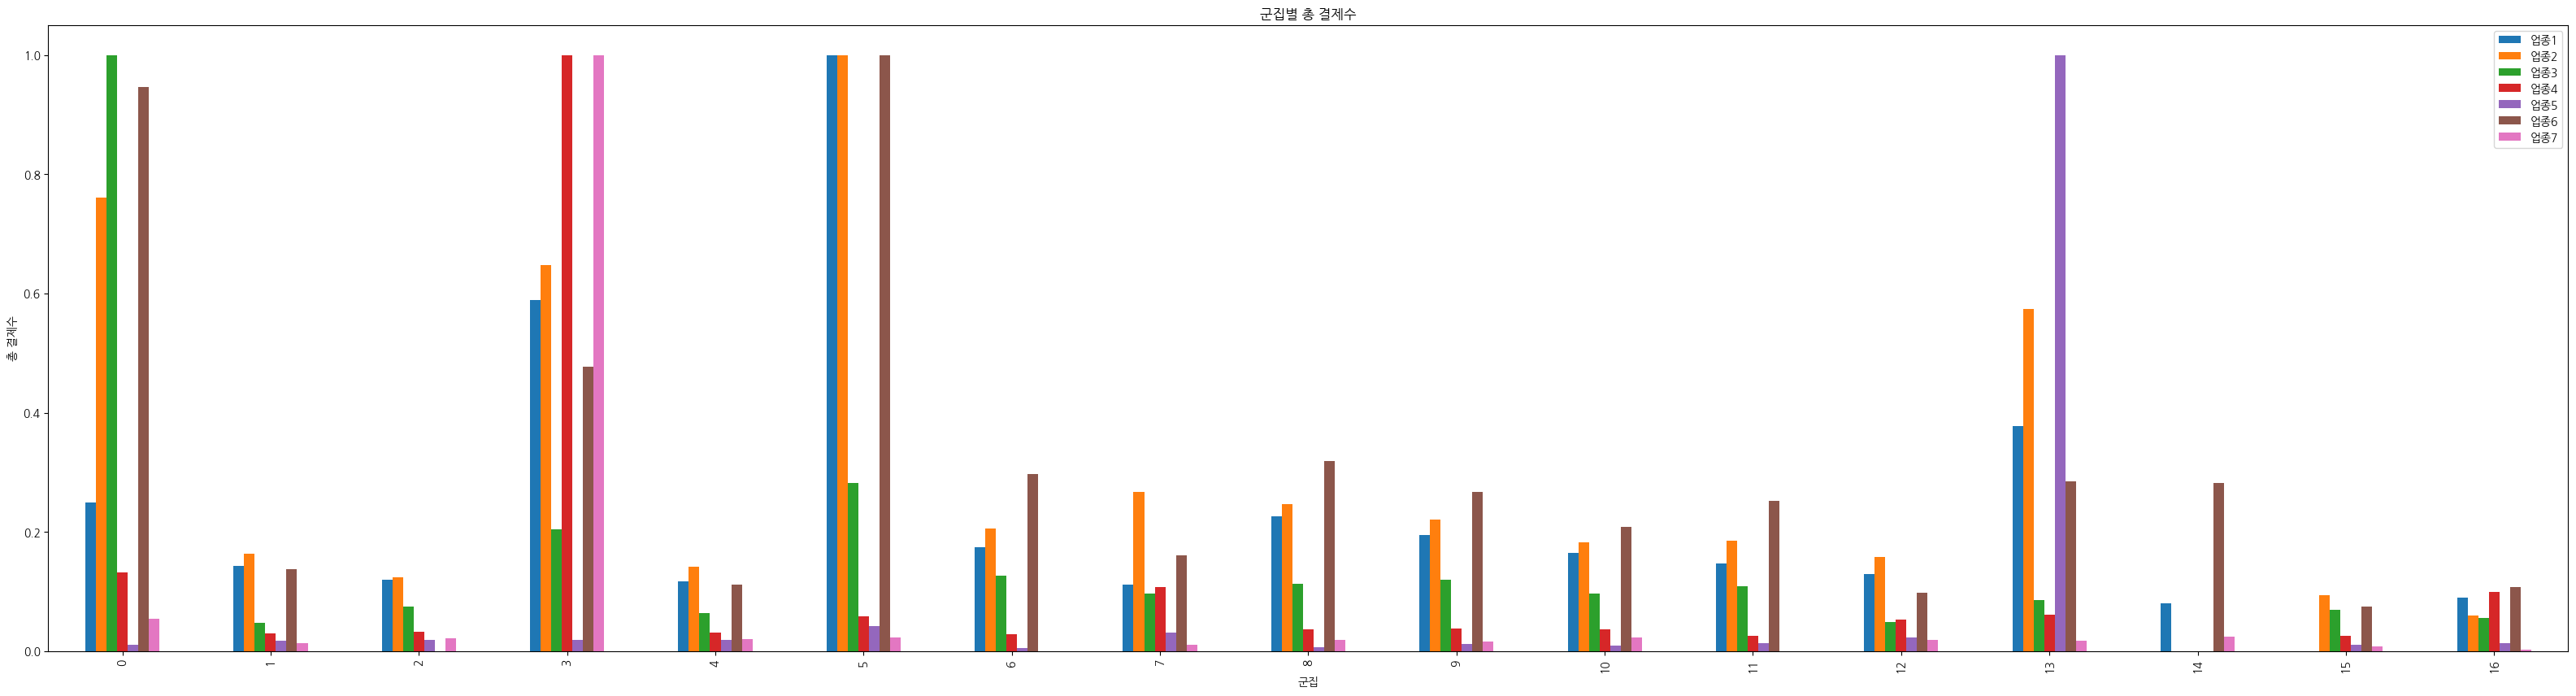

In [ ]:
df_s1.plot(kind='bar', figsize=(40,10))
plt.xlabel('군집')
plt.ylabel('총 결제수')
plt.title('군집별 총 결제수')
plt.show()

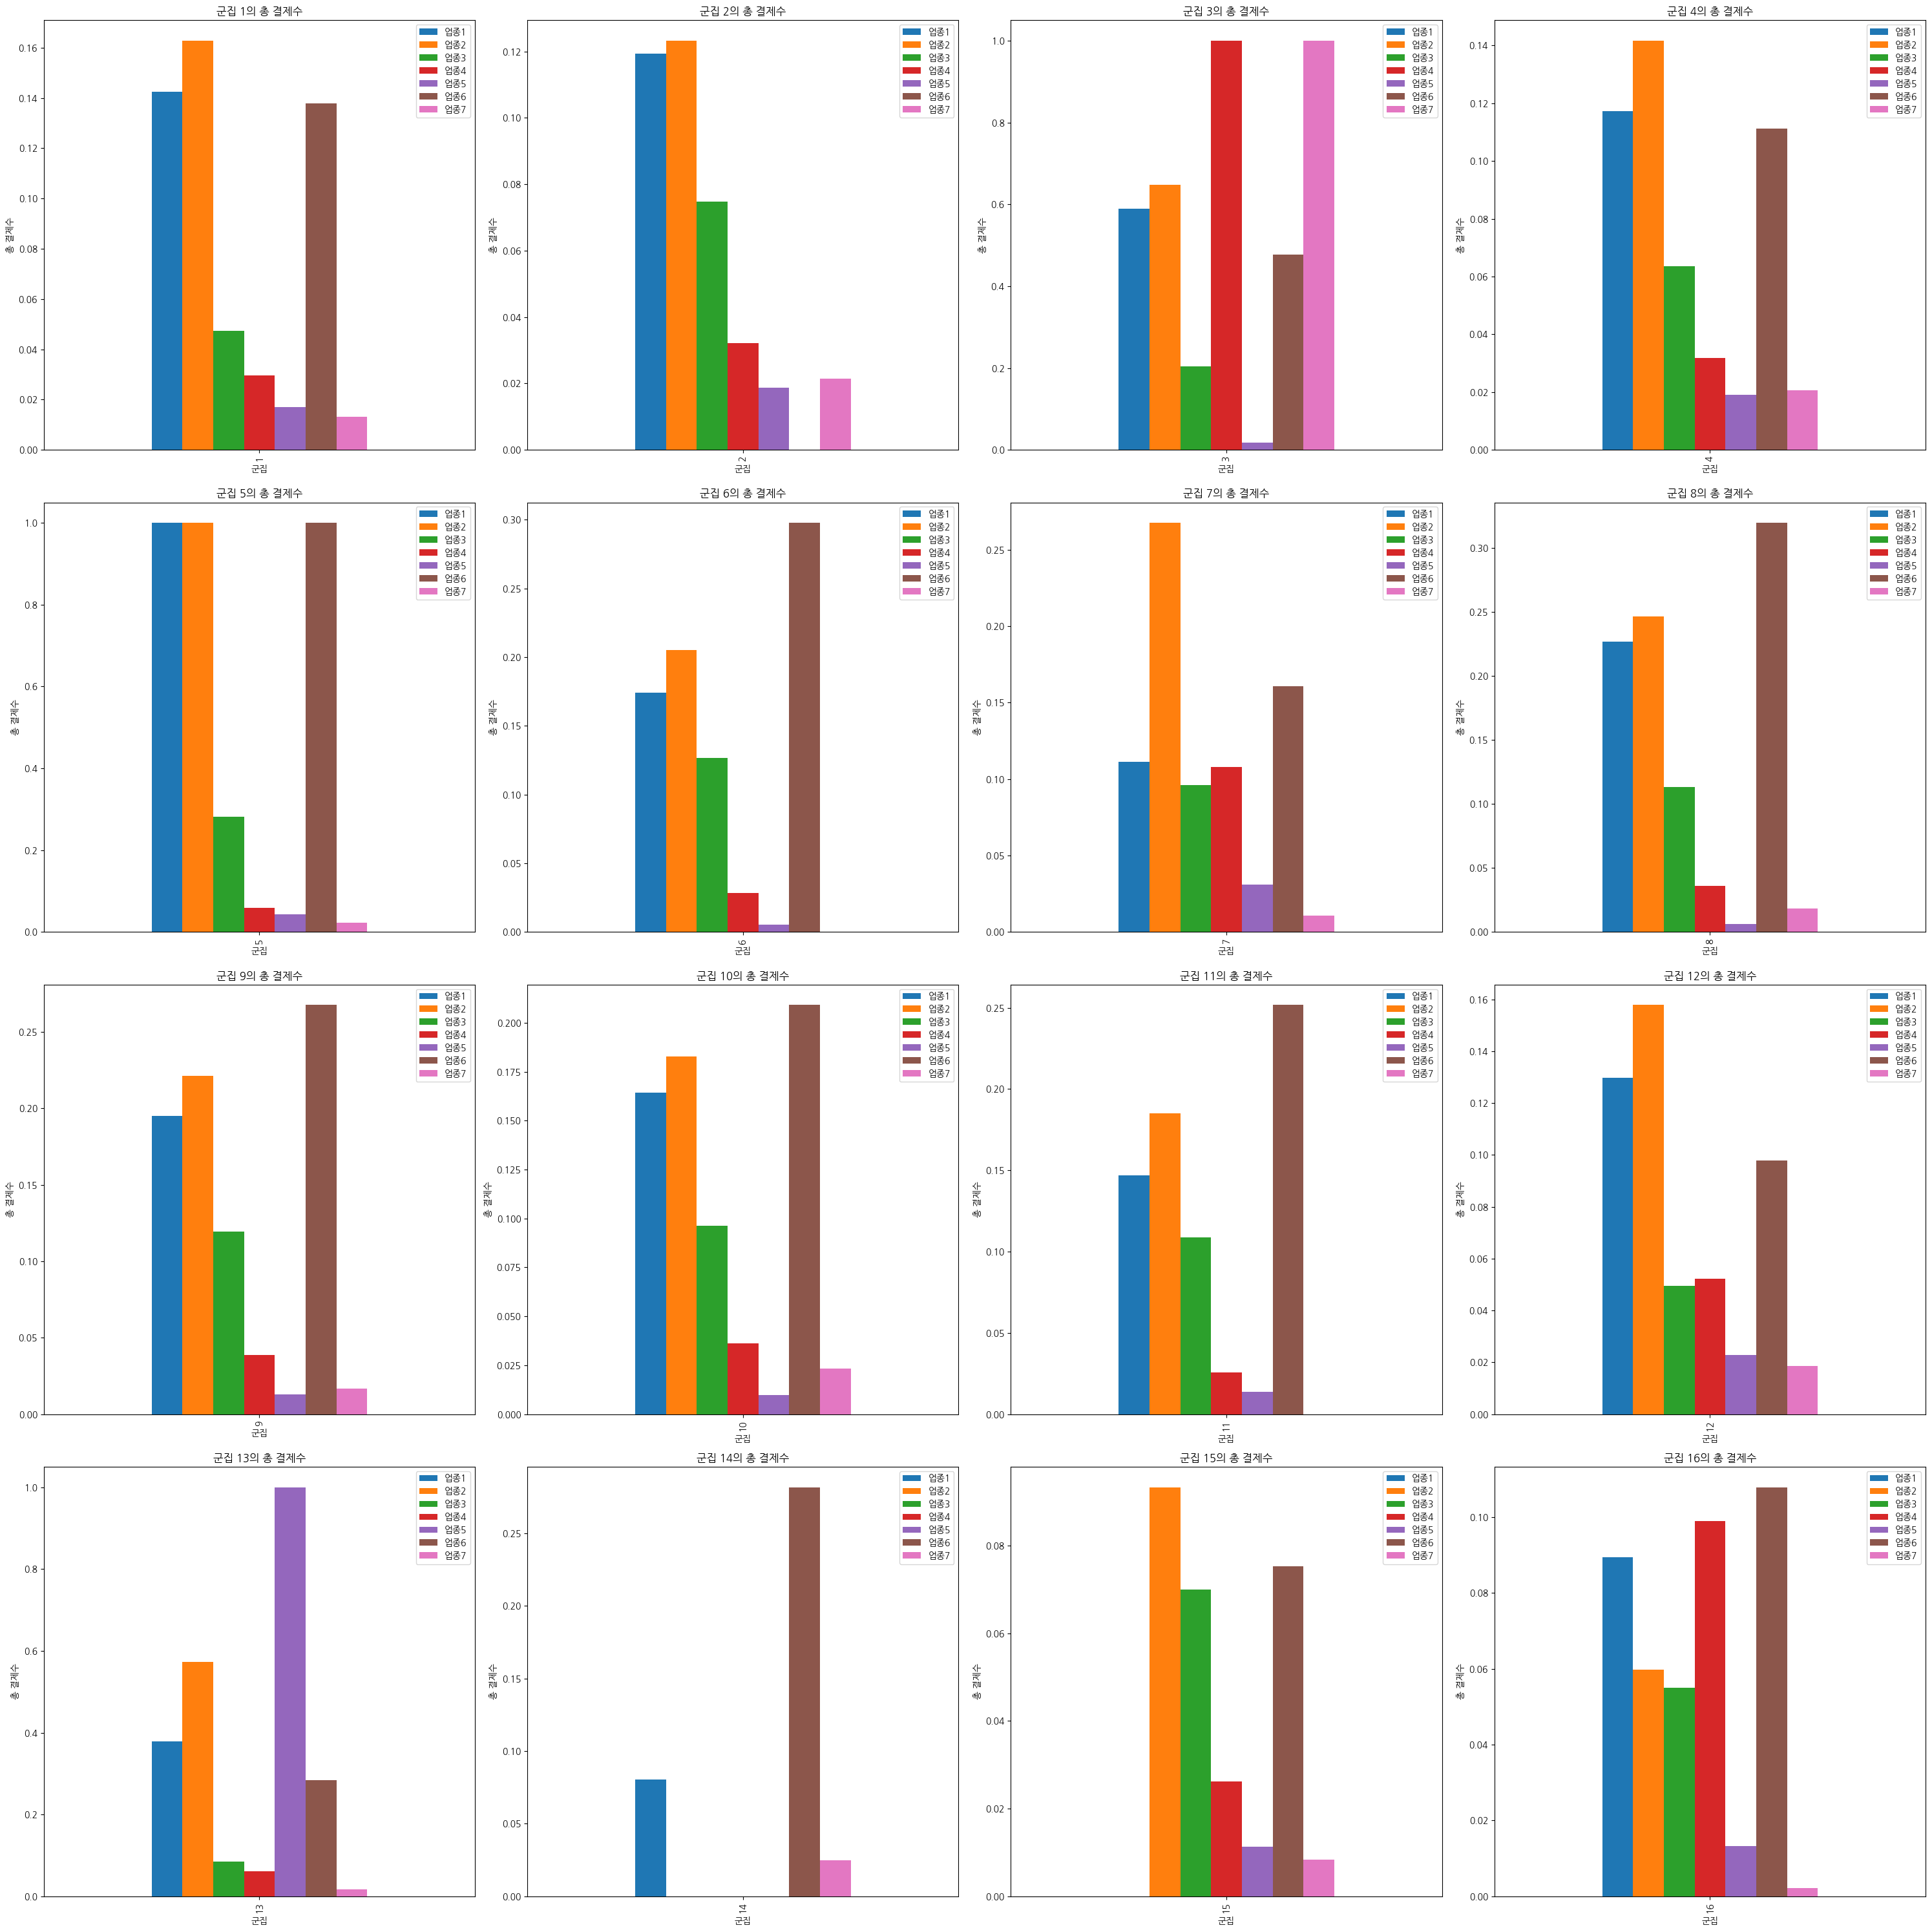

In [ ]:
# 군집별 결과를 따로 보기 위한 서브플롯 설정
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(30, 30))

# 각 군집에 대한 그래프 생성 및 출력
for i, ax in enumerate(axes.flatten()):
    # 군집별 데이터 필터링
    cluster_data = df_s1[df_s1.index == i+1]

    # 그래프 생성
    cluster_data.plot(kind='bar', ax=ax)
    ax.set_xlabel('군집')
    ax.set_ylabel('총 결제수')
    ax.set_title(f'군집 {i+1}의 총 결제수')

# 그래프 출력
plt.tight_layout()
plt.show()